In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

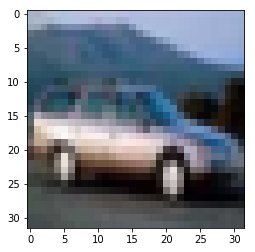

In [172]:
img = np.array(Image.open('cifar10/5.png'))
plt.imshow(img)
plt.show()

In [181]:
img_arr = []
for i in range(1, 151):
    img_path = os.path.join('cifar10/'+str(i) +'.png')
    img = np.array(Image.open(img_path))/255.
    img_arr.append(img)    

In [182]:
# Converting back to numpy array
img_arr = np.array(img_arr)
img_arr.shape

(150, 32, 32, 3)

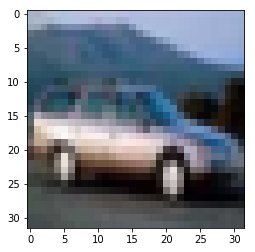

In [183]:
plt.imshow(img_arr[4])
plt.show()

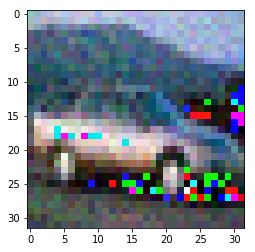

In [189]:
# Adding random noise to the images
noise_factor = 0.05
noisy_imgs = img_arr + noise_factor * np.random.normal(size=img.shape)

# Image with noise
plt.imshow(noisy_imgs[4])
plt.show()

In [152]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

Using TensorFlow backend.


In [232]:
def auto_encoder(img):
    # Encoder module
    f_size = 3 # filter size
    p_size = 1 # pool size
    conv_1 = Conv2D(32, (f_size, f_size), activation='relu', padding='same')(img)
    pool_1 = MaxPooling2D(pool_size=(p_size, p_size))(conv_1) 
    conv_2 = Conv2D(64, (f_size, f_size), activation='relu', padding='same')(pool_1)
    pool_2 = MaxPooling2D(pool_size=(p_size, p_size))(conv_2) 
    conv_3 = Conv2D(128, (f_size, f_size), activation='relu', padding='same')(pool_2) 

    # Decoder module
    conv_4 = Conv2D(128, (f_size, f_size), activation='relu', padding='same')(conv_3) 
    up_1 = UpSampling2D((p_size, p_size))(conv_4) 
    conv_5 = Conv2D(64, (f_size, f_size), activation='relu', padding='same')(up_1) 
    up_2 = UpSampling2D((p_size, p_size))(conv_5) 
    decoded = Conv2D(3, (f_size, f_size), activation='sigmoid', padding='same')(up_2) 
    return decoded

In [233]:
img = Input(shape=(32, 32, 3))
model = Model(img, auto_encoder(img))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 128)       147584    
__________

In [247]:
model.fit(noisy_imgs[:120], img_arr[:120], epochs=10, validation_split=0.2)

Train on 96 samples, validate on 24 samples
Epoch 1/10
96/96 [==============================] - 15s 158ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 2/10
96/96 [==============================] - 14s 148ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 3/10
96/96 [==============================] - 14s 149ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 4/10
96/96 [==============================] - 17s 174ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/10
96/96 [==============================] - 16s 166ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 6/10
96/96 [==============================] - 16s 171ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 7/10
96/96 [==============================] - 16s 163ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 8/10
96/96 [==============================] - 15s 158ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 9/10
96/96 [==============================] - 15s 159ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 10/10
96/96 [============================

In [ ]:
pred = model.predict(img_arr)

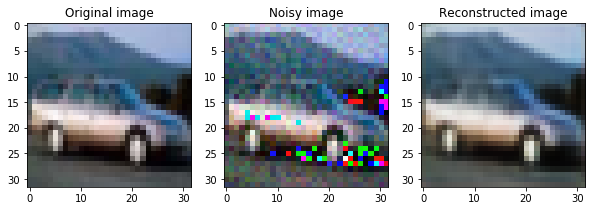

In [273]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot2grid((1, 3), (0,0))
ax1.set_title('Original image', fontsize='large')
ax1.imshow(img_arr[4])

ax2 = plt.subplot2grid((1, 3), (0,1))
ax2.set_title('Noisy image', fontsize='large')
ax2.imshow(noisy_imgs[4])

ax3 = plt.subplot2grid((1, 3), (0,2))
ax3.set_title('Reconstructed image', fontsize='large')
ax3.imshow(pred[4])

plt.show()

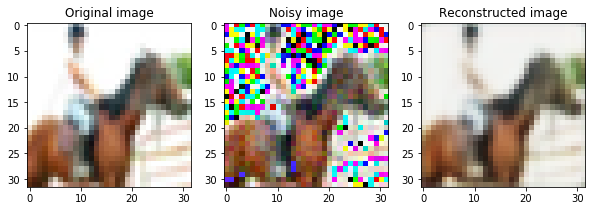

In [274]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot2grid((1, 3), (0,0))
ax1.set_title('Original image', fontsize='large')
ax1.imshow(img_arr[131])

ax2 = plt.subplot2grid((1, 3), (0,1))
ax2.set_title('Noisy image', fontsize='large')
ax2.imshow(noisy_imgs[131])

ax3 = plt.subplot2grid((1, 3), (0,2))
ax3.set_title('Reconstructed image', fontsize='large')
ax3.imshow(pred[131])

plt.show()